<a href="https://colab.research.google.com/github/juliocnsouzadev/deep-learning/blob/simple-regression/simple_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Tensorflow 
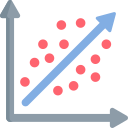

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.11.0


## Setting seed to maintain reproducibility 

In [ ]:
tf.random.set_seed(42)

## Creating a super simple (shitty) model
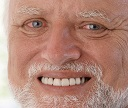

### Creating some data

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

### 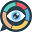 Visualising the Data 

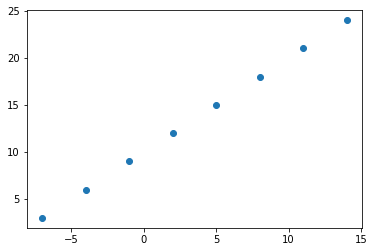

In [ ]:
plt.scatter(X,y) 

### The model

In [ ]:
# Converting data to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5, verbose=0)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# not amazing prediction at all... we expected 27 =/
shitty_pred = model.predict([17.0])
shitty_pred

1/1 [==============================] - 0s 80ms/step


array([[-3.0473988]], dtype=float32)

### Making the model less shitty

In [ ]:
better_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])
better_model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(lr=0.01),
    metrics=["mae"]
)
better_model.fit(tf.expand_dims(X, axis=-1), y, epochs=20, verbose=0)
better_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Some improvement there ;)
better_pred = better_model.predict([17.0])
better_pred

1/1 [==============================] - 0s 53ms/step


array([[30.225203]], dtype=float32)

## Trying a new model with some random data

### Creating some random data

In [ ]:
X1 = tf.range(-100, 100,4)
y1 = X1 + 10

### 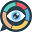 Visualising the Data 

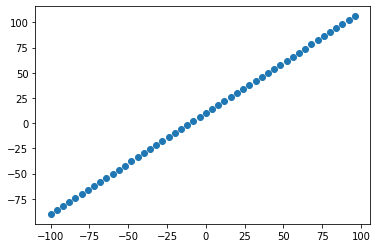

In [ ]:
plt.scatter(X1, y1)

### Splitting the data => train / test set

In [ ]:
len(X1)

50

In [ ]:
X_train = X1[:40]
X_test = X1[40:]

y_train = y1[:40]
y_test = y1[40:]

### 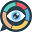 Visualising the Data 

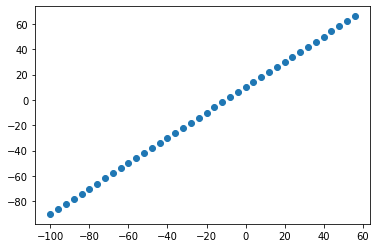

In [ ]:
plt.scatter(X_train, y_train)

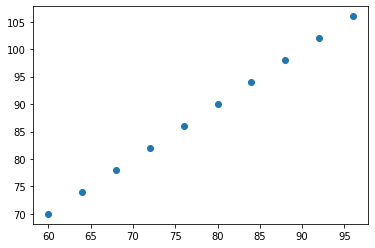

In [ ]:
plt.scatter(X_test, y_test)

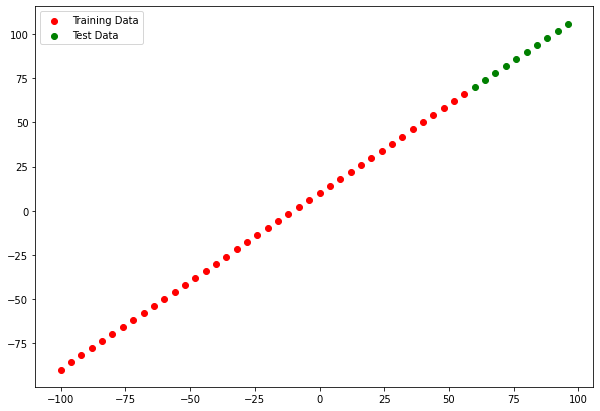

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Test Data')
plt.legend()

### Creating the Model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input-layer"), # define the input_shape to our model
  tf.keras.layers.Dense(1, name="output-layer") # define the input_shape to our model
], name="first-model")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

model.summary()

Model: "first-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output-layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### 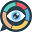 Visualising the model

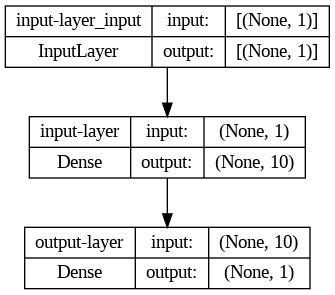

In [ ]:
plot_model(model=model, show_shapes=True)

### Making predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred


1/1 [==============================] - 0s 60ms/step


array([[ 91.02796],
       [ 96.97351],
       [102.91906],
       [108.86462],
       [114.81017],
       [120.75573],
       [126.70129],
       [132.64682],
       [138.59238],
       [144.53793]], dtype=float32)

### 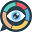 Visualising the Predictions

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

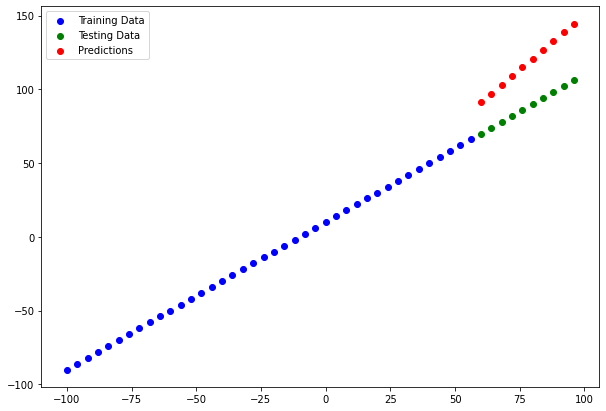

In [ ]:
plot_predictions(
    X_train,y_train,X_test,y_test,y_pred
)

### Evaluating the Models 📐

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 29.7829 - mae: 29.7829


[29.782943725585938, 29.782943725585938]

In [ ]:
# mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred) )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.782948>

In [ ]:
# mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=918.2516>

In [ ]:
def get_metric(y_true=y_test, y_pred=y_pred, metric="mae"):
    if metric == "mae":
        return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
    if metric == "mse":
        return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
    raise Exception("Invalid metric ", metric)

In [ ]:
mae = get_metric()
mse = get_metric(metric="mse")

In [ ]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.782948>

In [ ]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=918.2516>

## Some experiments to improve the model

In [ ]:
def build_model_mae(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test):
    
    # Set random seed
    tf.random.set_seed(42)
    
    # Create a model (same as above)
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input-layer"), # define the input_shape to our model
    tf.keras.layers.Dense(1, name="output-layer") # define the input_shape to our model
    ], name="1-input-10-opt-mae")
    
    # Compile model (same as above)
    model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(lr=0.01),
                metrics=["mae"])
    model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
    
    # predictions
    y_pred = model.predict(X_test)
    plot_predictions(X_train,y_train,X_test,y_test,y_pred)

    #evalating
    mae = get_metric(y_test, y_pred, "mae")
    mse = get_metric(y_test, y_pred, "mse")

    model.summary()
    print("MAE: ", mae)
    print("MSE: ", mse)

    return model, mae, mse

1/1 [==============================] - 0s 44ms/step
Model: "1-input-10-opt-mae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output-layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
MAE:  tf.Tensor(3.1244423, shape=(), dtype=float32)
MSE:  tf.Tensor(12.587706, shape=(), dtype=float32)


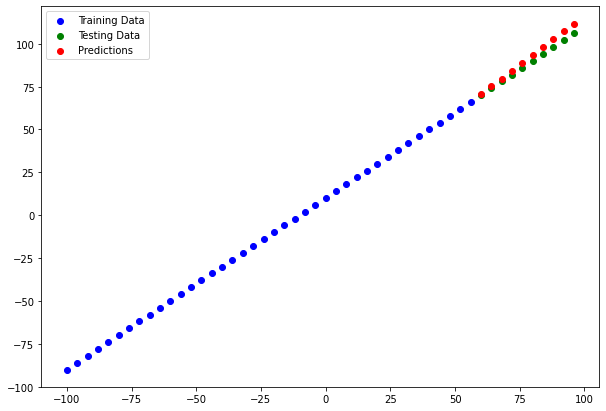

In [ ]:
model1, mae1, mse1 = build_model_mae()


In [ ]:
def build_model_mse(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test):
    
    # Set random seed
    tf.random.set_seed(42)
    
    # Create a model (same as above)
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input-layer"), # define the input_shape to our model
    tf.keras.layers.Dense(1, name="output-layer") # define the input_shape to our model
    ], name="1-input-10-opt-mse")
    
    # Compile model (same as above)
    model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(lr=0.01),
                metrics=["mse"])
    model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
    
    # predictions
    y_pred = model.predict(X_test)
    plot_predictions(X_train,y_train,X_test,y_test,y_pred)

    #evalating
    mae = get_metric(y_test, y_pred, "mae")
    mse = get_metric(y_test, y_pred, "mse")

    model.summary()
    print("MAE: ", mae)
    print("MSE: ", mse)

    return model, mae, mse

1/1 [==============================] - 0s 43ms/step
Model: "1-input-10-opt-mse"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output-layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
MAE:  tf.Tensor(29.933542, shape=(), dtype=float32)
MSE:  tf.Tensor(927.4608, shape=(), dtype=float32)


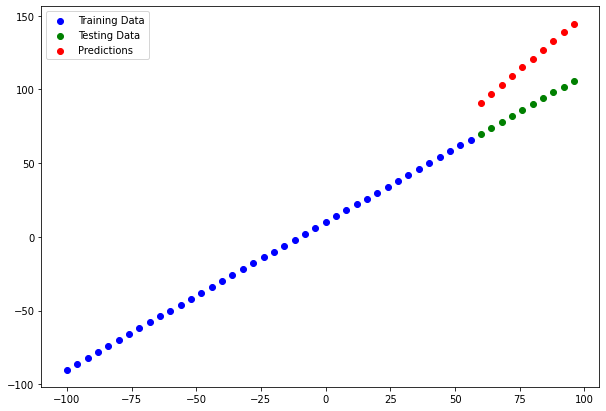

In [ ]:
model2, mae2, mse2 = build_model_mse()

## Comparing Models ⚖

In [ ]:
import pandas as pd

model_results = [
    [model.name, mae.numpy(), mse.numpy()],
    [model1.name, mae1.numpy(), mse1.numpy()],
    [model2.name, mae2.numpy(), mse2.numpy()]
]

pd.DataFrame(data=model_results, columns=["model","mae","mse"])

,model,mae,mse
0,first-model,29.782948,918.251587
1,1-input-10-opt-mae,3.124442,12.587706
2,1-input-10-opt-mse,29.933542,927.460815


## Saving Models 🦺

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
saved_models_main_path = "/content/gdrive/MyDrive/Colab Notebooks/simple_regression_models/"

In [ ]:
model.save(saved_models_main_path + "first_model")
model1.save(saved_models_main_path + "mae_model")
model2.save(saved_models_main_path + "mse_model")

In [ ]:
loaded_moadel = tf.keras.models.load_model(saved_models_main_path + "first_model")
loaded_moadel1 = tf.keras.models.load_model(saved_models_main_path + "mae_model")
loaded_moadel2 = tf.keras.models.load_model(saved_models_main_path + "mse_model")